            easting      northing  oil saturation
count   5700.000000   5700.000000     5700.000000
mean   59420.992281  53264.912281        0.842202
std    25774.172044  29959.260466        0.072584
min     1300.000000    400.000000        0.651525
25%    37376.000000  29200.000000        0.795245
50%    69436.500000  52200.000000        0.826121
75%    81717.750000  82000.000000        0.908284
max    95389.000000  98900.000000        0.977031
            easting      northing  oil saturation
count   4300.000000   4300.000000     4300.000000
mean   51191.866512  47718.604651        0.858658
std    27285.363991  29135.263438        0.069243
min     1100.000000   1100.000000        0.678170
25%    30102.750000  26200.000000        0.810185
50%    53048.000000  37600.000000        0.859648
75%    77122.000000  75400.000000        0.914909
max    92916.000000  99100.000000        1.000000
Train on 5700 samples, validate on 4300 samples
Epoch 1/100
5700/5700 [=============================

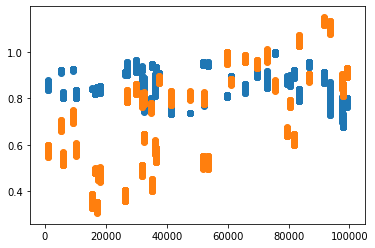

In [13]:
import tensorflow.keras as K
from tensorflow.keras.callbacks import EarlyStopping
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                X_train.append(pd.read_csv("data/" + i))
            else: X_test.append(pd.read_csv("data/" + i))

# combines all well log data into a dataframe
    X_train = pd.concat(X_train).reset_index()
    X_test = pd.concat(X_test).reset_index()

# removes columns that might be redundant/problematic
    X_train = X_train[['easting', 'northing', 'oil saturation']]
    X_test = X_test[['easting', 'northing', 'oil saturation']]

    print(X_train.describe())
    print(X_test.describe())

# separates our dependent variable out
    y_train = X_train.pop('oil saturation')
    y_test = X_test.pop('oil saturation')

# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[2,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=.001, patience=10, restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test)
    plt.scatter(X_test['northing'], y_test)
    plt.scatter(X_test['northing'], y_pred)
    print(len(X_train), len(X_test))
    return model

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)

model = run_model(optimizer, .5, 100, 10, 5, 5)

Train on 4900 samples, validate on 5100 samples
Epoch 1/100
4900/4900 [==============================] - 0s 79us/sample - loss: 341972268461.6490 - val_loss: 14859120.5843
Epoch 2/100
4900/4900 [==============================] - 0s 75us/sample - loss: 20119854.0604 - val_loss: 12650043.4376
Epoch 3/100
4900/4900 [==============================] - 0s 58us/sample - loss: 18138192.1861 - val_loss: 11815115.9867
Epoch 4/100
4900/4900 [==============================] - 0s 75us/sample - loss: 15951861.1314 - val_loss: 9028212.8918
Epoch 5/100
4900/4900 [==============================] - 0s 57us/sample - loss: 13804468.7445 - val_loss: 8142896.1765
Epoch 6/100
4900/4900 [==============================] - 0s 71us/sample - loss: 11278958.7784 - val_loss: 10924377.9192
Epoch 7/100
4900/4900 [==============================] - 0s 68us/sample - loss: 9283364.5306 - val_loss: 5007281.4765
Epoch 8/100
4900/4900 [==============================] - 0s 62us/sample - loss: 7205322.7012 - val_loss: 6769628

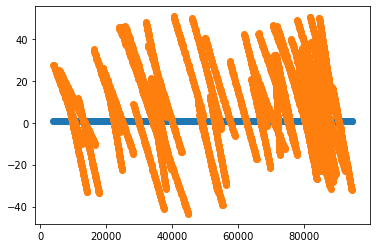

In [15]:
"""
Unlike oil_prod.py, this one trains one complete wells, rather than random points from random wells
It is kind of suprising how well (pun intended) it performs on test data, despite not having data from every well.
Also considering we are only using 50 epochs and a relatively fast learning rate, this data must have a lot of structure, meaning ML isn't strictly necessary, it just makes the job substantially easier.

Assuming that it isn't overfitting, the next thing to do is figure out whether we can get as good performance just from x,y values
"""


def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                X_train.append(pd.read_csv("data/" + i))
            else: X_test.append(pd.read_csv("data/" + i))

# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)

# removes columns that might be redundant/problematic
    X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()

# separates our dependent variable out
    y_train = X_train.pop('oil saturation')
    y_test = X_test.pop('oil saturation')

# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[7,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test)
    plt.scatter(X_test['easting'], y_test)
    plt.scatter(X_test['easting'], y_pred)

    return model.to_json()

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)

info = run_model(optimizer, .5, 100, 10, 10, 10)
